<a href="https://colab.research.google.com/github/Shibli-Nomani/datascience/blob/main/Hw06Linear_KNN_Regression_and_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [81]:
import pandas as pd # data frame library
import numpy as np
import seaborn as sns # data visialization library
import matplotlib.pyplot as plt
%matplotlib inline
path='/content/gdrive/MyDrive/AIQUEST ML Course/weight-height.csv'
df=pd.read_csv(path)
df.head(7)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889


In [82]:
df.shape


(8555, 3)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [84]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [85]:
df.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

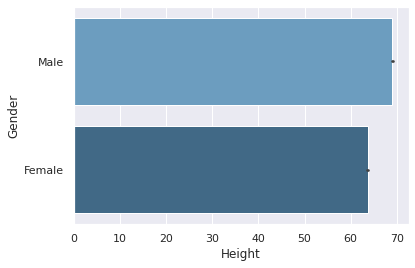

In [86]:
sns.set(style="darkgrid")
sns.barplot(x="Height", y="Gender", data=df,
                 palette="Blues_d")

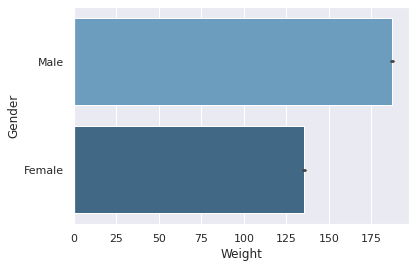

In [87]:
sns.barplot(x="Weight", y="Gender", data=df,
                 palette="Blues_d")

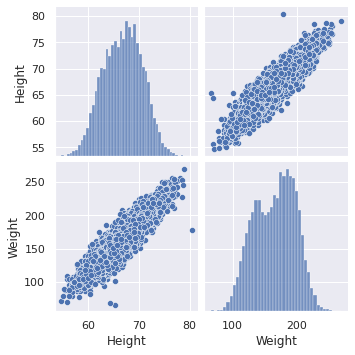

In [88]:
sns.pairplot(df, vars=["Height", "Weight"])


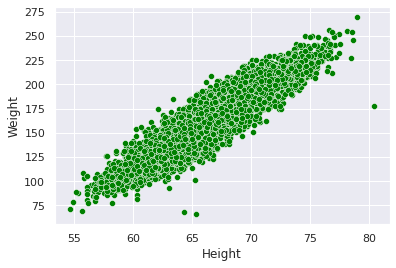

In [89]:
#Sactter Plot
sns.scatterplot(data=df, x="Height", y="Weight", color='green')

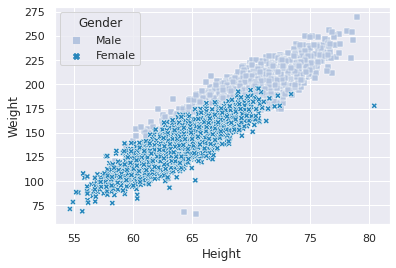

In [90]:
#Sactter Plot
markers = {"Male": "s", "Female": "X"}
sns.scatterplot(data=df, x="Height", y="Weight", hue= "Gender", palette="PuBu",style="Gender", markers=markers)
from matplotlib import rcParams
rcParams['figure.figsize'] = 5,10

**String to Numeric Value Encoding**

In [91]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [92]:
import numpy as np
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
  if is_numeric_dtype(df[column]):
    continue
  else:
    df[column]=le.fit_transform(df[column])

In [93]:
df.head(3)

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856


In [94]:
df.Gender.unique()

array([1, 0])

**Devide the Dataset Features and Target**

In [95]:
#Target
y=df['Weight']
y.head(5)

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [96]:
#Features
X= df.copy()
X=df.drop('Weight', axis=1)
X.head(5)


,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


**Splitting Data for Train and Test**

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)

In [98]:
X_train.count()

Gender    5988
Height    5988
dtype: int64

In [99]:
X_test.count()

Gender    2567
Height    2567
dtype: int64

#1. Linear Regression

In [100]:
from sklearn.linear_model import LinearRegression
le_r =  LinearRegression()
le_r.fit(X,y)

LinearRegression()

In [101]:
#value Coefficient or Slope
m= le_r.coef_
m

array([19.5062689 ,  5.97547256])

In [102]:
#value y intercept
c= le_r.intercept_
c

-244.98864716917748

In [103]:
#Target prediction
y_pred = le_r.predict(X_test)
y_pred

array([142.50069611, 186.14621633, 198.55728528, ..., 102.86520678,
       190.94708177, 143.40278697])

In [104]:
#male=1; female=0
X_test_sample=[[1, 74.110105], [1, 71.730978], [1, 69.881796], [1, 67.253016], [0, 61.79309615],
[0, 65.96801895], [0, 62.85037864]] #In actual case, 1-4 male and 5-7 Female 

y_pred_sample=le_r.predict(X_test_sample)
y_pred_sample

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([217.36052093, 203.14411281, 192.0943765 , 176.38617374,
       124.25430357, 149.20144022, 130.57206608])

In [105]:
#Accuracy Check
le_r.score(X_test , y_test)

0.9059597450155089

In [106]:
#Accuracy Check
le_r.score(X_train , y_train)

0.8973707281841031

In [107]:
#Accuracy Check
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9059597450155089

In [108]:
#MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

96.78742491385272

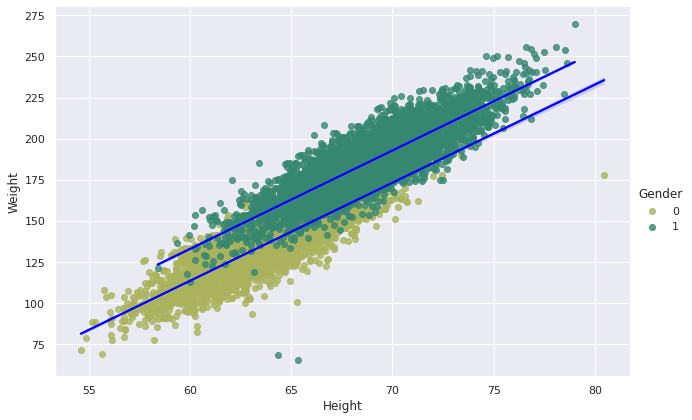

In [109]:
ax= sns.lmplot(
    data=df,
    x="Height", y="Weight", hue="Gender", line_kws={'color': 'blue'}, palette='gist_earth_r', height=6, aspect=1.5 )


#2. K-nearest neighbors (KNN) Regression



In [110]:
 from sklearn.neighbors import KNeighborsRegressor

In [111]:
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(X,y)

KNeighborsRegressor(n_neighbors=2)

In [112]:
#Target prediction
y_pred = knr.predict(X_test)
y_pred

array([144.41881455, 180.92857315, 186.78419885, ..., 100.31313891,
       188.6554241 , 139.96280255])

In [113]:
#Accuracy Check
knr.score(X_test , y_test)

0.9494475565847128

In [114]:
#Accuracy Check
knr.score(X_train , y_train)

0.9492680520715306

In [115]:
#Accuracy Check
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9494475565847128

In [116]:
#MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

52.02921687181533

In [117]:
#male=1; female=0
X_test_sample=[[1, 74.110105], [1, 71.730978], [1, 69.881796], [1, 67.253016], [0, 61.79309615],
[0, 65.96801895], [0, 62.85037864]] #In actual case, 1-4 male and 5-7 Female 

y_pred_sample_01=knr.predict(X_test_sample)
y_pred_sample_01

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([226.79629205, 209.3392233 , 194.0122698 , 163.19357825,
       118.61823665, 152.80134035, 121.2439618 ])

# **K-nearest neighbors (KNN) Regression with Optimization and Tunning**

**RandomizedSearchCV**

In [118]:
from sklearn.model_selection import RandomizedSearchCV

model_rs = KNeighborsRegressor(n_neighbors=2)
k_range=list(range(5, 100))
options=['uniform', 'distance']
param_grid=dict(n_neighbors=k_range, weights=options)

rand_search = RandomizedSearchCV(model_rs,
                           param_grid)
rand_search.fit(X_train, y_train)


RandomizedSearchCV(estimator=KNeighborsRegressor(n_neighbors=2),
                   param_distributions={'n_neighbors': [5, 6, 7, 8, 9, 10, 11,
                                                        12, 13, 14, 15, 16, 17,
                                                        18, 19, 20, 21, 22, 23,
                                                        24, 25, 26, 27, 28, 29,
                                                        30, 31, 32, 33, 34, ...],
                                        'weights': ['uniform', 'distance']})

In [119]:
rand_search.best_score_

0.8930435606379101

In [120]:
rand_search.best_estimator_

KNeighborsRegressor(n_neighbors=55)

In [121]:
rand_search.best_params_

{'n_neighbors': 55, 'weights': 'uniform'}

In [122]:
rand_search_new = rand_search.best_estimator_

In [123]:
rand_search_new.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=55)

In [124]:
#Target prediction
y_pred = rand_search_new.predict(X_test)
y_pred

array([143.5435296 , 185.29838481, 196.95033353, ..., 103.87202872,
       192.80266153, 143.11652365])

In [125]:
#Accuracy Check
rand_search_new.score(X_test , y_test)

0.9035773160846217

In [126]:
#Accuracy Check
rand_search_new.score(X_train , y_train)

0.8979804836906551

In [127]:
#Accuracy Check
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9035773160846217

In [128]:
#MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

99.2394510307414

In [129]:
#Prediction 
#male=1; female=0
X_test_sample=[[1, 74.110105], [1, 71.730978], [1, 69.881796], [1, 67.253016], [0, 61.79309615],
[0, 65.96801895], [0, 62.85037864]] #In actual case, 1-4 male and 5-7 Female 

y_pred_sample_02=rand_search_new.predict(X_test_sample)
y_pred_sample_02

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([216.41380619, 202.56121693, 193.03678225, 178.86934433,
       122.98336274, 148.75946269, 129.03723154])

**Model Compare among Linear Regression,  KNN Regression and KNN Regression Optimized with RandomizedSearchCV**

In [130]:
lr = 'Accuracy of KNN Class'
knn_r = 'Accuracy of KNN'
knn_rs = 'Accuracy of KNN class using RandomizedSearchCV'
df1=pd.DataFrame([[lr,0.9059597450155089],[knn_r, 0.9494475565847128], [knn_rs, 0.9035773160846217]],
                 columns=['Accuracy', 'Value'])
df1

,Accuracy,Value
0,Accuracy of KNN Class,0.905960
1,Accuracy of KNN,0.949448
2,Accuracy of KNN class using RandomizedSearchCV,0.903577


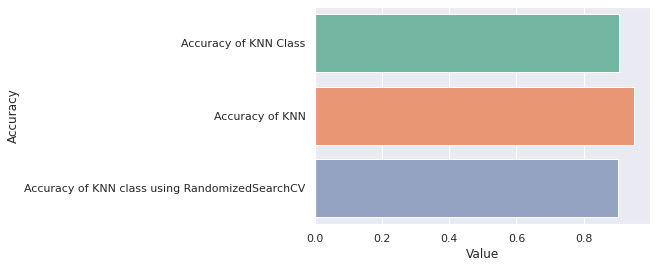

In [204]:
sns.set()
sns.barplot(x="Value", y="Accuracy",  data=df1, palette="Set2")
sns.set(rc={'figure.figsize':(10,5)})

#**KNN Classification Algorithm**

In [205]:
import pandas as pd # data frame library
import numpy as np
import seaborn as sns # data visialization library
import matplotlib.pyplot as plt
%matplotlib inline
path='/content/gdrive/MyDrive/AIQUEST ML Course/weight-height.csv'
df=pd.read_csv(path)
df.head(7)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889


In [206]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [207]:
import numpy as np
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
  if is_numeric_dtype(df[column]):
    continue
  else:
    df[column]=le.fit_transform(df[column])

In [208]:
#Target
Y=df['Gender']
Y

0       1
1       1
2       1
3       1
4       1
       ..
8550    0
8551    0
8552    0
8553    0
8554    0
Name: Gender, Length: 8555, dtype: int64

In [209]:
#Features
X=df.copy()
X=df.drop('Gender', axis=1)
X.head(3)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856


In [210]:
df.Gender.unique()

array([1, 0])

In [211]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, train_size=0.70, random_state=42)

In [212]:
X_train.count()

Height    5988
Weight    5988
dtype: int64

In [213]:
X_test.count()

Height    2567
Weight    2567
dtype: int64

In [217]:
from sklearn.neighbors import KNeighborsClassifier
knn_cl = KNeighborsClassifier(n_neighbors=2)

In [218]:
knn_cl.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=2)

In [219]:
Y_pred= knn_cl.predict(X_test)

In [220]:
print(Y_pred)

[0 1 1 ... 0 1 0]


**1. Confusion Matrix**

In [221]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test, Y_pred)
cm

array([[ 981,   85],
       [ 232, 1269]])

**Confusion Matrix Plot**

Text(30.5, 0.5, 'Actual Values')

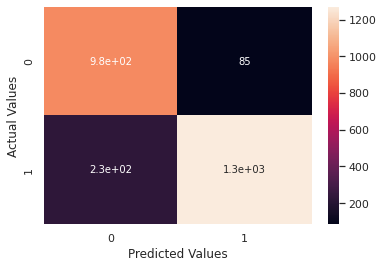

In [222]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

**Assign the TRUE POSITIVE, FALSE NEGATIVE, FALSE POSITIVE, TRUE NEGATIVE using Confsion Matrix**

In [224]:
tp, fn, fp, tn = confusion_matrix(Y_test, Y_pred).reshape(-1)

In [225]:
tp

981

In [226]:
fn

85

In [227]:
fp

232

In [228]:
tn

1269

**2. Accuracy**

In [229]:
accuracy = (tp+tn)/len(Y_test)
accuracy


0.876509544215037

In [230]:
accuracy= (tp+tn)/(tp+fp+tn+fn)
accuracy

0.876509544215037

In [231]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test, Y_pred)
accuracy

0.876509544215037

**Harmonic Mean or F1 Score**

In [232]:
from sklearn.metrics import f1_score
f1_score(Y_test, Y_pred, average=None)

array([0.86090391, 0.88896673])

**3. ROC and AUC Graph**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


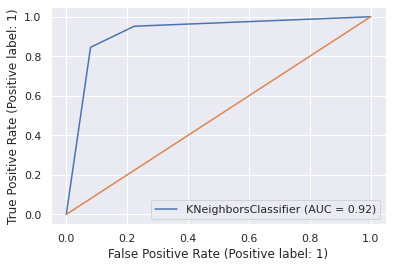

In [233]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(knn_cl,X_test, Y_test)
plt.plot([0,1],[0,1])

**4. Classification Report Summary**

In [234]:
from sklearn.metrics import classification_report
class_r=classification_report(Y_test, Y_pred)
print(class_r)

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1066
           1       0.94      0.85      0.89      1501

    accuracy                           0.88      2567
   macro avg       0.87      0.88      0.87      2567
weighted avg       0.88      0.88      0.88      2567



**For K-value selection**

In [235]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
k_range=range(1,26)
scores=[]

for k in k_range:
    knn_cl=KNeighborsClassifier(n_neighbors=k)
    knn_cl.fit(X_train, Y_train)
    Y_pred=knn_cl.predict(X_test)
    scores.append(metrics.accuracy_score(Y_test, Y_pred))

**K Value and Accuracy Graph**

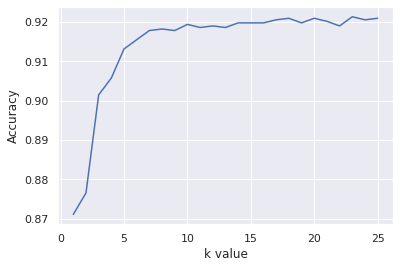

In [236]:
import matplotlib.pyplot as plt

plt.plot(k_range, scores)
plt.xlabel('k value')
plt.ylabel('Accuracy')

plt.show()

**K-nearest neighbors (KNN) Classifier with Optimization and Tunning**

In [237]:
from sklearn.model_selection import RandomizedSearchCV
k_range=list(range(5, 100, 20))
options=['uniform', 'distance']
param_dist = dict(n_neighbors=k_range, weights=options)

In [238]:
record=KNeighborsClassifier()
rand = RandomizedSearchCV(record, param_grid, cv=10, scoring='accuracy', n_iter=10, random_state=42)
rand.fit(X, Y)


RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [5, 6, 7, 8, 9, 10, 11,
                                                        12, 13, 14, 15, 16, 17,
                                                        18, 19, 20, 21, 22, 23,
                                                        24, 25, 26, 27, 28, 29,
                                                        30, 31, 32, 33, 34, ...],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy')

In [239]:
rand.best_score_

0.9174755424386511

In [241]:
rand.best_params_

{'n_neighbors': 92, 'weights': 'distance'}

In [242]:
 rand.best_estimator_

KNeighborsClassifier(n_neighbors=92, weights='distance')

In [243]:
new_rand = rand.best_estimator_

In [244]:
new_rand.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=92, weights='distance')

In [245]:
Y_pred_rs= new_rand.predict(X_test)

In [249]:
Y_pred_rs

array([0, 1, 1, ..., 0, 1, 0])

In [247]:
new_rand.score(X_test, Y_test)

0.9185820023373588

**1. Confusion Matrix**

In [253]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rs=confusion_matrix(Y_test, Y_pred_rs)

In [254]:
cm_rs

array([[ 954,  112],
       [  97, 1404]])

Text(30.5, 0.5, 'Actual Values')

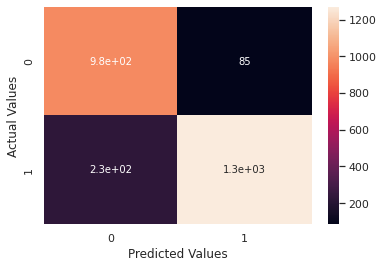

In [252]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

**Assign the TRUE POSITIVE, FALSE NEGATIVE, FALSE POSITIVE, TRUE NEGATIVE using Confsion Matrix**

In [255]:
tp, fn, fp, tn = confusion_matrix(Y_test, Y_pred).reshape(-1)

In [256]:
tp

958

In [257]:
fn

108

In [258]:
fp

95

In [259]:
tn

1406

**2. Accuracy**

In [262]:
accuracy = (tp+tn)/len(Y_test)
accuracy

0.9209193611219322

In [263]:
accuracy= (tp+tn)/(tp+fp+tn+fn)
accuracy

0.9209193611219322

In [264]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test, Y_pred_rs)
accuracy

0.9185820023373588

**Harmonic Mean or F1 Score**

In [265]:
from sklearn.metrics import f1_score
f1_score(Y_test, Y_pred_rs, average=None)


array([0.90127539, 0.93072589])

**3. ROC and AUC Graph**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


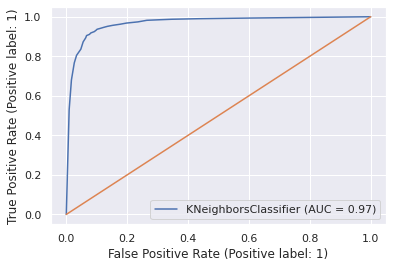

In [266]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(knn_cl, X_test, Y_test)
plt.plot([0,1],[0,1])

**4. Classification Report Summary**

In [267]:
from sklearn.metrics import classification_report
class_rs=classification_report(Y_test, Y_pred_rs)
print(class_rs)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1066
           1       0.93      0.94      0.93      1501

    accuracy                           0.92      2567
   macro avg       0.92      0.92      0.92      2567
weighted avg       0.92      0.92      0.92      2567



**Compare Accuracy KNN and KNN with RandomizedSearchCV optimizer**

In [268]:
d = 'Accuracy of KNN Class'
r_rs = 'Accuracy of KNN class using RandomizedSearchCV'

df2=pd.DataFrame([[d,0.876509544215037],[r_rs, 0.9209193611219322]],
                 columns=['Accuracy', 'Value'])
df2

,Accuracy,Value
0,Accuracy of KNN Class,0.876510
1,Accuracy of KNN class using RandomizedSearchCV,0.920919


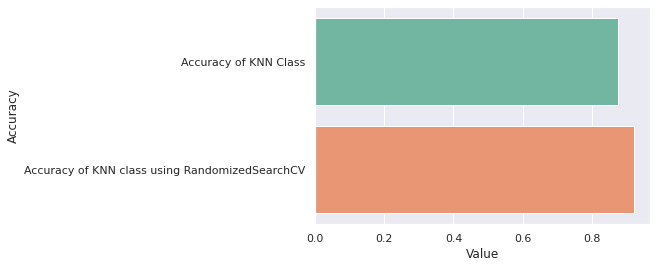

In [269]:
sns.barplot(x="Value", y="Accuracy",  data=df2, palette="Set2")
